In [40]:
import json
import pickle

# MARKABLE
with open('../datasets/markable/annotations/markable_trainval.json') as json_file:
    data = json.load(json_file)

# with open('../datasets/markable/annotations/markable_test.json') as json_file:
#     data = json.load(json_file)
    
    

In [41]:
data.keys()  

dict_keys(['info', 'licenses', 'categories', 'annotations', 'images'])

In [42]:
data['images'][0]
im_area = {}
for img in data['images']:
    im_area[img['id']] = img['height'] * img['width']



In [26]:
data['annotations'][4]
# data['images'][4]




{'segmentation': [],
 'gender': 1,
 'area': 352728.0,
 'iscrowd': 0,
 'image_id': 206530,
 'bbox': [11.0, 0.0, 552.0, 639.0],
 'category_id': 40,
 'id': 776176}

In [27]:
a = set()

In [30]:
a.add(2)


In [31]:
a

{2}

In [43]:
freqs= {}
box_areas_perclass = {}
aspect_ratio_perclass = {}
imgs_perclass = {}
imgs_freqs = {}

for i in range(40):
    freqs[i] = 0   # number of boxes per class
    box_areas_perclass[i] = []    # box areas per class
    aspect_ratio_perclass[i] = []    # box areas per class    
    imgs_perclass[i] = set() 
    imgs_freqs[i] = 0
    
box_areas = []    


distinct_classes_per_img = {} # number of distinc classes per image
obj_per_img = {} # number of objects per image
for img in data['images']:
    distinct_classes_per_img[img['id']] = []
    obj_per_img[img['id']] = 0


for k in data['annotations']:
    imgs_perclass[k['category_id']-1].add(k['image_id'])
    freqs[k['category_id']-1]  += 1
    box_area = k['bbox'][2] * k['bbox'][3]
    box_areas.append(box_area/im_area[k['image_id']])
    box_areas_perclass[k['category_id']-1].append(box_area/im_area[k['image_id']])
    aspect_ratio_perclass[k['category_id']-1].append(k['bbox'][2] / k['bbox'][3])
    
    if k['category_id'] not in distinct_classes_per_img[k['image_id']]:
        distinct_classes_per_img[k['image_id']].append(k['category_id'])
    
    obj_per_img[k['image_id']] += 1

for j in imgs_perclass:
    imgs_freqs[j] = len(imgs_perclass[j])
    

In [38]:
k['image_id']
k['category_id']
len(imgs_perclass[0])
imgs_freqs

{0: 2062,
 1: 784,
 2: 14913,
 3: 239,
 4: 6675,
 5: 3386,
 6: 1179,
 7: 5636,
 8: 1364,
 9: 6325,
 10: 1113,
 11: 2654,
 12: 11933,
 13: 6455,
 14: 1883,
 15: 2378,
 16: 1241,
 17: 4656,
 18: 448,
 19: 3674,
 20: 4867,
 21: 670,
 22: 241,
 23: 2710,
 24: 5828,
 25: 7760,
 26: 4746,
 27: 166,
 28: 3312,
 29: 147,
 30: 2998,
 31: 1074,
 32: 2077,
 33: 364,
 34: 904,
 35: 131,
 36: 514,
 37: 571,
 38: 321,
 39: 34042}

In [21]:
import numpy as np
import matplotlib.pyplot as plt
print(np.sum(freqs))

np.array(list(freqs.values()))

# aspect_ratio_perclass
# box_areas_perclass
# distinct_classes_per_img[1]
# obj_per_img

{0: 2568, 1: 850, 2: 31206, 3: 257, 4: 7503, 5: 3777, 6: 1206, 7: 6320, 8: 1484, 9: 6857, 10: 1190, 11: 2815, 12: 12562, 13: 7415, 14: 2044, 15: 2742, 16: 1388, 17: 9081, 18: 470, 19: 7436, 20: 5586, 21: 762, 22: 462, 23: 2798, 24: 6129, 25: 8633, 26: 4954, 27: 174, 28: 3627, 29: 188, 30: 3257, 31: 1331, 32: 3311, 33: 374, 34: 1321, 35: 135, 36: 553, 37: 789, 38: 347, 39: 39787}


array([ 2568,   850, 31206,   257,  7503,  3777,  1206,  6320,  1484,
        6857,  1190,  2815, 12562,  7415,  2044,  2742,  1388,  9081,
         470,  7436,  5586,   762,   462,  2798,  6129,  8633,  4954,
         174,  3627,   188,  3257,  1331,  3311,   374,  1321,   135,
         553,   789,   347, 39787])

In [20]:
labels = []
for n in data['categories']:
    labels.append(n['name'])


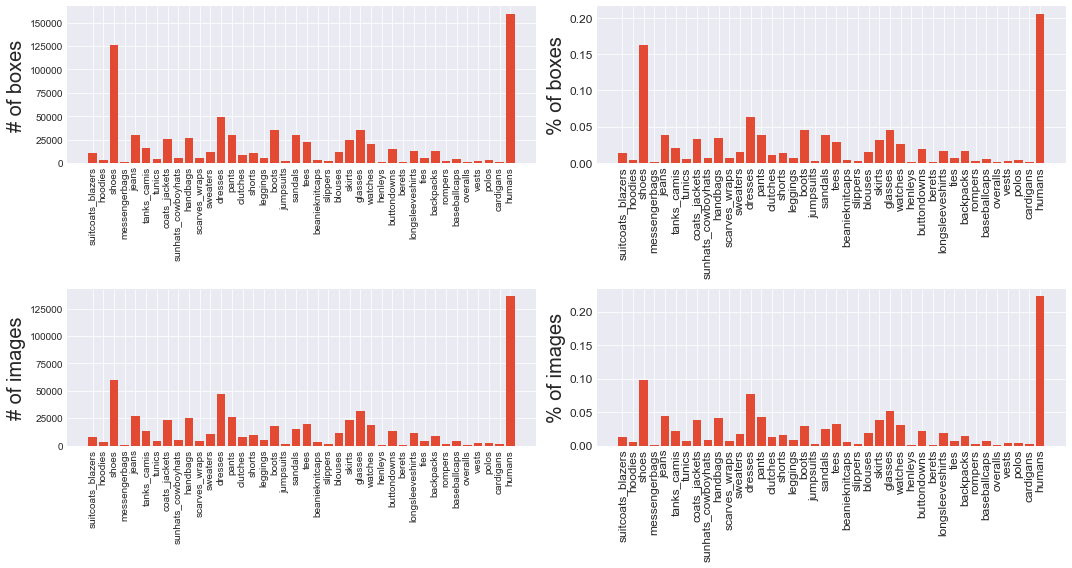

In [44]:
from matplotlib import pyplot as plt
import numpy as np

plt.style.use('ggplot')
# create a color palette
palette = plt.get_cmap('Set1')
plt.style.use('seaborn-darkgrid')


x = np.arange(40)

# accs = matrix.diagonal()/matrix.sum(axis=1)
# accs.shape


# BOXES -----------------------------------------

fig, ax = plt.subplots(figsize=(15,8))
ax = plt.subplot(2,2,1)
ax.bar(x, np.array(list(freqs.values())))
# plt.ylabel('acc.')
# plt.xlabel('class name')
ax.set_ylabel('# of boxes', fontsize=20)
#ax.set_title('COCO ')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90, fontsize=10)
#ax.legend()


ax = plt.subplot(2,2,2)
ax.bar(x, np.array(list(freqs.values()))/ np.array(list(freqs.values())).sum())
ax.set_ylabel('% of boxes', fontsize=20)
#ax.set_title('COCO ')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90, fontsize=10)
#ax.legend()


ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)


# IMAGES --------------------------------------

# fig, ax = plt.subplots(figsize=(15,4))
ax = plt.subplot(2,2,3)
ax.bar(x, np.array(list(imgs_freqs.values())))
# plt.ylabel('acc.')
# plt.xlabel('class name')
ax.set_ylabel('# of images', fontsize=20)
#ax.set_title('COCO ')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90, fontsize=10)
#ax.legend()


ax = plt.subplot(2,2,4)
ax.bar(x, np.array(list(imgs_freqs.values()))/ np.array(list(imgs_freqs.values())).sum())
ax.set_ylabel('% of images', fontsize=20)
#ax.set_title('COCO ')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90, fontsize=10)
#ax.legend()


ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)






fig.tight_layout()
plt.show()
fig.savefig('freqs.png')


In [26]:
np.array(list(freqs.values())).sum()

776172

In [68]:
# box_areas
# plt.hist(box_areas)
# box_areas.sort()
# box_areas
# plt.plot(np.cumsum(box_areas[::-1]))

In [67]:
# box_areas.sort()
# box_areas
# a = plt.hist(box_areas)



In [64]:
def cdf_plot(values):
    """Numpy function to plot CDF."""
    normalized_values = values / np.sum(values)
    sorted_values = np.sort(normalized_values)
    cumulative_values = np.cumsum(sorted_values)
    fraction_of_examples = (np.arange(cumulative_values.size, dtype=np.float32)
                            / cumulative_values.size)
    fig = plt.figure(frameon=False)
    ax = fig.add_subplot('111')
    ax.plot(fraction_of_examples, cumulative_values)
    ax.set_ylabel('cumulative normalized values')
    ax.set_xlabel('fraction of examples')
    fig.canvas.draw()
    width, height = fig.get_size_inches() * fig.get_dpi()
    image = np.fromstring(fig.canvas.tostring_rgb(), dtype='uint8').reshape(
        1, int(height), int(width), 3)
    return image

/home/ali/miniconda3/envs/CenterNet/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  from ipykernel import kernelapp as app


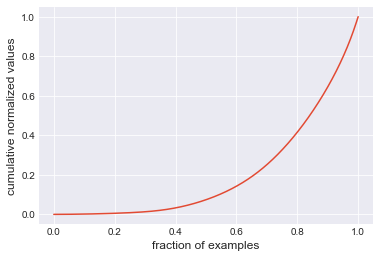

In [291]:
aaa = cdf_plot(box_areas)

In [353]:
from numpy import random
def random_color():
    levels = range(32,256,32)
    levels = range(1,256,5)    
    return tuple(random.choice(levels)/256 for _ in range(3))

In [354]:
#  list(range(1,256,10))

In [355]:
print(random_color())

my_colors = []

for i in range(20):
    my_colors.append(random_color())

(0.84375, 0.43359375, 0.7265625)


In [342]:
my_colors


[(0.5, 0.5, 0.5),
 (0.5, 0.5, 0.5),
 (0.5, 0.5, 0.5),
 (0.5, 0.5, 0.5),
 (0.5, 0.5, 0.5),
 (0.5, 0.5, 0.5),
 (0.5, 0.5, 0.5),
 (0.5, 0.5, 0.5),
 (0.5, 0.5, 0.5),
 (0.5, 0.5, 0.5),
 (0.5, 0.5, 0.5),
 (0.5, 0.5, 0.5),
 (0.5, 0.5, 0.5),
 (0.5, 0.5, 0.5),
 (0.5, 0.5, 0.5),
 (0.5, 0.5, 0.5),
 (0.5, 0.5, 0.5),
 (0.5, 0.5, 0.5),
 (0.5, 0.5, 0.5),
 (0.5, 0.5, 0.5)]

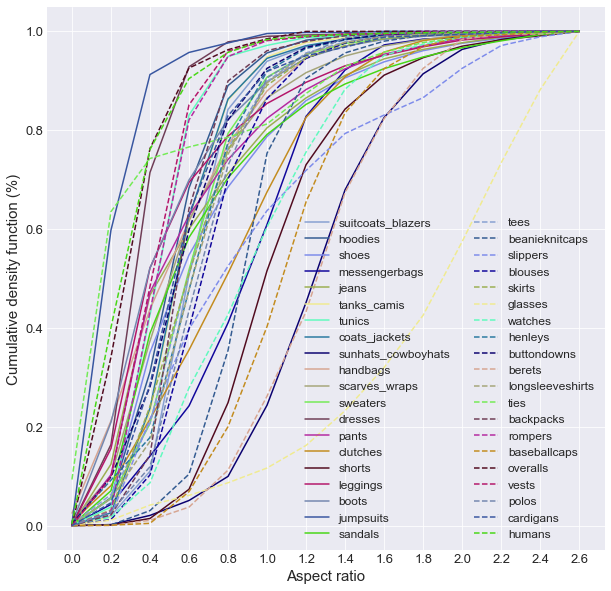

In [410]:
# aspect_ratio_perclass[2]
# xx = plt.hist(aspect_ratio_perclass[0])
# plt.plot(xx[0])


all_poss=['.','o','v','^','>','<','s','p','*','h','H','D','d','1','x','+', 'X', 'P', '*', '.']*2
my_colors = my_colors * 2
res = 15

ticks = [str(i) for i in np.arange(res)/5]
fig, ax = plt.subplots(figsize=(10,10))

for j in range(40):
    vals = np.histogram(aspect_ratio_perclass[j], bins=np.arange(res)/5)[0]
    ax.set_xticks(np.arange(res))
    ax.set_xticklabels(ticks, rotation=0, fontsize=13)
    if j<20:
        plt.plot(np.cumsum(vals/vals.sum()), color = my_colors[j]) #, marker = all_poss[j]) #  vals/vals.sum())
    else:
        plt.plot(np.cumsum(vals/vals.sum()), color = my_colors[j], linestyle = '--') #  vals/vals.sum())        


        
        
ax.set_ylabel('Cumulative density function (%)', fontsize=15)
ax.set_xlabel('Aspect ratio', fontsize=15)
        

ax.tick_params(axis = 'y', which = 'major', labelsize = 13)    
    
plt.legend(labels, fontsize = 12, ncol=2 )
fig.savefig('aspect_ratio.png')


In [113]:
np.histogram(aspect_ratio_perclass[1], bins=np.arange(20)/5)

(array([   1,  148,  830, 1204,  592,  237,   89,   42,   27,   14,    7,
           5,    2,    0,    2,    1,    1,    1,    0]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8]))

In [411]:
# help(np.histogram)
vals
# labels

array([  135, 15791, 14322,  5696,  2109,  1030,   283,   129,    83,
          49,    31,    23,    29,    28])

/home/ali/miniconda3/envs/CenterNet/lib/python3.6/site-packages/ipykernel_launcher.py:55: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/ali/miniconda3/envs/CenterNet/lib/python3.6/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/ali/miniconda3/envs/CenterNet/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


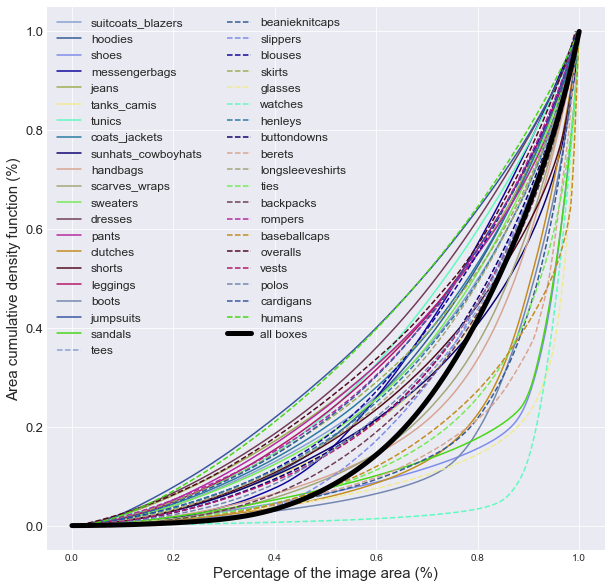

In [412]:
# box area per class

all_poss=['.','o','v','^','>','<','s','p','*','h','H','D','d','1','x','+', 'X', 'P', '*', '.']*2

res = 5

ticks = [str(i) for i in np.arange(res)/5]
fig, ax = plt.subplots(figsize=(10,10))

for j in range(40):
    values = box_areas_perclass[j]
    normalized_values = values / np.sum(values)
    sorted_values = np.sort(normalized_values)
    cumulative_values = np.cumsum(sorted_values)
    fraction_of_examples = (np.arange(cumulative_values.size, dtype=np.float32)
                            / cumulative_values.size)

#     fig = plt.figure(frameon=False)
#     ax = fig.add_subplot('111')
    if j<20:
        ax.plot(fraction_of_examples, cumulative_values, color = my_colors[j]) #  vals/vals.sum())
    else:
        ax.plot(fraction_of_examples, cumulative_values, color = my_colors[j], linestyle = '--') #  vals/vals.sum())        


# avg        
# box_areas        
values = box_areas        
normalized_values = values / np.sum(values)
sorted_values = np.sort(normalized_values)
cumulative_values = np.cumsum(sorted_values)
fraction_of_examples = (np.arange(cumulative_values.size, dtype=np.float32)
                        / cumulative_values.size)

ax.plot(fraction_of_examples, cumulative_values, color = 'black', linewidth = 5)



        
ax.set_ylabel('Area cumulative density function (%)', fontsize=15)
ax.set_xlabel('Percentage of the image area (%)', fontsize=15)
        

ax.tick_params(axis = 'y', which = 'major', labelsize = 13)        
    
#     vals = np.histogram(box_areas_perclass[j], bins=np.arange(res)/5)[0]
#     ax.set_xticks(np.arange(res))
#     ax.set_xticklabels(ticks, rotation=0, fontsize=10)
#     if j<20:
#         plt.plot(np.cumsum(vals/vals.sum()), marker = all_poss[j]) #  vals/vals.sum())
#     else:
#         plt.plot(np.cumsum(vals/vals.sum()), marker = all_poss[j], linestyle = '--') #  vals/vals.sum())        
labels.append('all boxes')    
plt.legend(labels, fontsize = 12, ncol=2 )
fig.savefig('object_size.png')


In [417]:
# box_areas_perclass[0]


for l in distinct_classes_per_img:
    distinct_classes_per_img[l] = len(distinct_classes_per_img[l])

distinct_classes_per_img   

{206530: 4,
 206531: 1,
 206532: 1,
 206533: 5,
 206534: 2,
 206535: 2,
 206536: 5,
 206537: 3,
 206538: 1,
 206539: 3,
 206540: 4,
 206541: 6,
 206542: 3,
 206543: 1,
 206544: 1,
 206545: 5,
 206546: 5,
 206547: 1,
 206548: 1,
 206549: 3,
 206550: 2,
 206551: 5,
 206552: 5,
 206553: 1,
 206554: 4,
 206555: 1,
 206556: 1,
 206557: 1,
 206558: 4,
 206559: 5,
 206560: 9,
 206561: 1,
 206562: 3,
 206563: 2,
 206564: 5,
 206565: 1,
 206566: 5,
 206567: 4,
 206568: 1,
 206569: 3,
 206570: 2,
 206571: 2,
 206572: 1,
 206573: 3,
 206574: 9,
 206575: 2,
 206576: 3,
 206577: 4,
 206578: 3,
 206579: 3,
 206580: 7,
 206581: 1,
 206582: 6,
 206583: 1,
 206584: 5,
 206585: 3,
 206586: 4,
 206587: 3,
 206588: 4,
 206589: 1,
 206590: 6,
 206591: 1,
 206592: 6,
 206593: 2,
 206594: 6,
 206595: 4,
 206596: 1,
 206597: 6,
 206598: 4,
 206599: 5,
 206600: 2,
 206601: 3,
 206602: 8,
 206603: 3,
 206604: 3,
 206605: 1,
 206606: 5,
 206607: 2,
 206608: 4,
 206609: 3,
 206610: 2,
 206611: 1,
 206612: 2,
 206

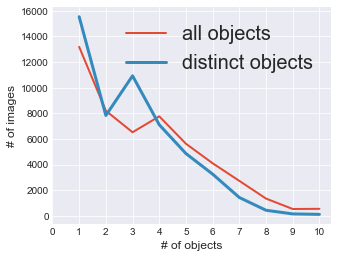

In [418]:
res= 12
ticks = [str(i) for i in np.arange(res)]

fig, ax = plt.subplots(figsize=(5,4))
tt = np.histogram(np.array(list(obj_per_img.values())), np.arange(1,res))
ax.plot(tt[1][1:], tt[0], linewidth=2)


tt = np.histogram(np.array(list(distinct_classes_per_img.values())), np.arange(1,res))
ax.plot(tt[1][1:], tt[0], linewidth=3)


ax.set_xticks(np.arange(1,res))
ax.set_xticklabels(ticks, rotation=0, fontsize=10)

plt.legend(['all objects', 'distinct objects'], fontsize=20)
plt.ylabel('# of images')
plt.xlabel('# of objects')

plt.show()
fig.savefig('obj_per_img.png')


In [387]:
tt[0]
tt[1]

np.array(list(obj_per_img.values()))
np.array(list(distinct_classes_per_img.values()))
# np.arange(1,res)
# ticks

array([1, 4, 1, ..., 8, 3, 2])

In [228]:
# distinct_classes_per_img 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,3))
tt = np.histogram(np.array(list(obj_per_img.values())), np.arange(1,20))
ax.plot(tt[0])

ticks = [str(i) for i in np.arange(1,20)]
ax.set_xticks(np.arange(1,20))
ax.set_xticklabels(ticks, rotation=0, fontsize=10)

plt.show()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [371]:

# for l in distinct_classes_per_img:
#     distinct_classes_per_img[l] = len(distinct_classes_per_img[l])

# distinct_classes_per_img     
#     # obj_per_img

In [24]:

plt.style.use('ggplot')
# create a color palette
palette = plt.get_cmap('Set1')
plt.style.use('seaborn-darkgrid')


x = np.arange(40)

# accs = matrix.diagonal()/matrix.sum(axis=1)
# accs.shape


fig, ax = plt.subplots(figsize=(20,4))
ax = plt.subplot(1,2,1)
ax.bar(x, np.array(list(freqs.values())))
# plt.ylabel('acc.')
# plt.xlabel('class name')
ax.set_ylabel('#', fontsize=20)
#ax.set_title('COCO ')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90, fontsize=10)
#ax.legend()


ax = plt.subplot(1,2,2)
ax.bar(x, np.array(list(freqs.values()))/ np.array(list(freqs.values())).sum())
ax.set_ylabel('#', fontsize=20)
#ax.set_title('COCO ')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90, fontsize=10)
#ax.legend()




ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)



fig.tight_layout()
plt.show()
fig.savefig('freqs.png')

In [416]:
# data['images']
distinct_classes_per_img
# obj_per_img

{206530: [13, 3, 10, 40],
 206531: [3],
 206532: [40],
 206533: [21, 18, 40, 27, 14],
 206534: [25, 29],
 206535: [13, 40],
 206536: [32, 3, 1, 14, 40],
 206537: [18, 13, 40],
 206538: [13],
 206539: [13, 18, 40],
 206540: [17, 13, 8, 40],
 206541: [26, 10, 16, 20, 40, 24],
 206542: [25, 6, 40],
 206543: [40],
 206544: [3],
 206545: [26, 12, 13, 18, 40],
 206546: [33, 29, 5, 35, 40],
 206547: [40],
 206548: [3],
 206549: [10, 40, 31],
 206550: [21, 40],
 206551: [12, 8, 3, 40, 5],
 206552: [29, 26, 8, 40, 5],
 206553: [40],
 206554: [31, 3, 14, 40],
 206555: [13],
 206556: [24],
 206557: [13],
 206558: [39, 25, 3, 40],
 206559: [21, 26, 8, 40, 5],
 206560: [33, 9, 35, 21, 14, 3, 26, 39, 40],
 206561: [27],
 206562: [14, 12, 40],
 206563: [31, 40],
 206564: [29, 26, 40, 27, 14],
 206565: [40],
 206566: [18, 26, 25, 40, 21],
 206567: [25, 17, 3, 21],
 206568: [18],
 206569: [18, 14, 8],
 206570: [14, 21],
 206571: [13, 40],
 206572: [3],
 206573: [3, 13, 40],
 206574: [26, 32, 8, 1, 3, 4

In [381]:

obj_per_img[1]

5